*The* codes and materials presented in this tutorial were selected from various sources. For more detailed and more comprehensive tutorials, we encourage you to review these sources. 

[Network Science with Python and NetworkX Quick Start Guide, published by Packt](https://github.com/PacktPublishing/Network-Science-with-Python-and-NetworkX-Quick-Start-Guide.git)

[A First Course in Network Science](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience.git)


[NetworkX tutorial](https://networkx.org/documentation/stable/tutorial.html)



```
https://github.com/PacktPublishing/Network-Science-with-Python-and-NetworkX-Quick-Start-Guide.git
```



# The Characteristics of Network Science
Network science is defined not only by its subject matter, but also by its methodology. In this section we discuss the key characteristics of the approach network science adopted to understand complex systems.



*   Interdisciplinary Nature

Network science offers a language through which different disciplines can seamlessly interact with each other. 

* Empirical, Data Driven Nature

Several key concepts of network science have their roots in graph theory, a fertile field of mathematics. What distinguishes network science from graph theory is its empirical nature, i.e. its focus on data, function and utility.

* Quantitative and Mathematical Nature

To contribute to the development of network science and to properly use its tools, it is essential to master the mathematical formalism behind it. Network science borrowed the formalism to deal with graphs from graph theory and the conceptual framework to deal with randomness and seek universal organizing principles from statistical physics.

* Computational Nature


Given the size of many of the networks of practical interest, and the exceptional amount of auxiliary data behind them, network scientists are regularly confronted by a series of formidable computational challenges. 


source: [networkscience by Albert-László Barabási
](http://networksciencebook.com/)

In [ ]:
import os, sys
import json

import networkx as nx   

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np 

import scipy.stats as sts
import random

In [ ]:
# Configure plotting in Jupyter
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

# NetworkX Package

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.



---



[Tutorial](https://networkx.org/documentation/stable/tutorial.html)



---



![picture](https://networkx.org/_static/networkx_logo.svg)




#Network Definitions

In network science, a network is simply a set of things and the connections between them.
The things are called nodes, and the connections are called edges. Nodes are really just
placeholders for any type of thing that can have a connection or relationship, such as
subway stations, people, or atoms. Similarly, edges are placeholders for connections or
relationships, such as subway tracks, friendships, or molecular bonds.

## Creating a graph

Create an empty graph with no nodes and no edges.

In [ ]:
G = nx.Graph()

By definition, a `Graph` is a collection of nodes (vertices) along with
identified pairs of nodes (called edges, links, etc).  In NetworkX, nodes can
be any [hashable](https://docs.python.org/3/glossary.html#term-hashable) object e.g., a text string, an image, an XML object,
another Graph, a customized node object, etc.

## Nodes

The graph `G` can be grown in several ways.  NetworkX includes many
graph generator functions and
facilities to read and write graphs in many formats.
To get started though we’ll look at simple manipulations.  You can add one node
at a time,

In [ ]:
G.add_node(1)


or add nodes from any [iterable](https://docs.python.org/3/glossary.html#term-iterable) container, such as a list

In [ ]:
G.add_nodes_from([2, 3, 4])


## Creating your first network

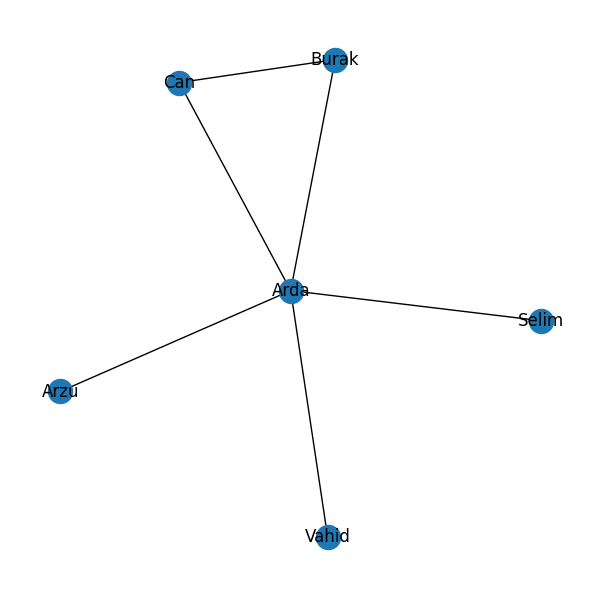

In [ ]:
#import networkx as nx

G = nx.Graph()      #Hello World of Network Analysis!

G.add_node('Arda')
G.add_node('Selim')
G.add_nodes_from(['Burak', 'Can', 'Arzu', "Vahid"])



G.add_edge('Arda', 'Burak')
G.add_edge('Arda', 'Selim')
G.add_edge('Arda', 'Arzu')
G.add_edges_from([('Burak', 'Can'), ('Arda', 'Can') , ('Arda', 'Vahid')])
G.add_edge('Arzu', 'Arda')

plt.figure(figsize=(7.5, 7.5))
nx.draw_networkx(G)

Nodes from one graph can be incorporated into another:

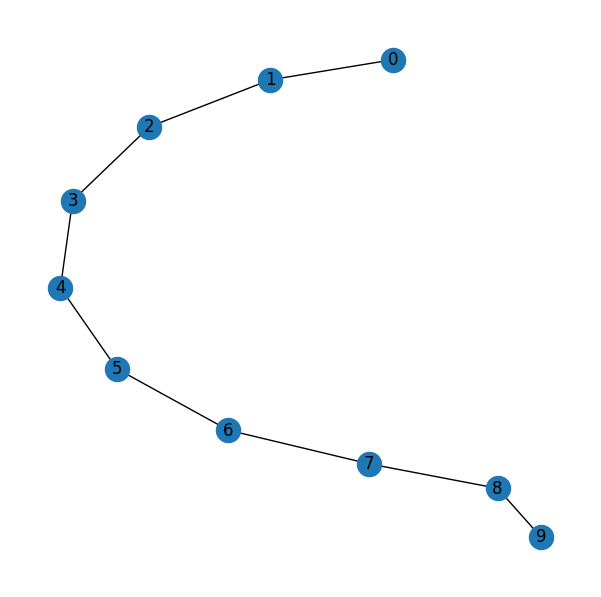

In [ ]:
H = nx.path_graph(10)
nx.draw_networkx(H)

In [ ]:
G.add_nodes_from(H)

`G` now contains the nodes of `H` as nodes of `G`.
In contrast, you could use the graph `H` as a node in `G`.

In [ ]:
G.add_node(H)

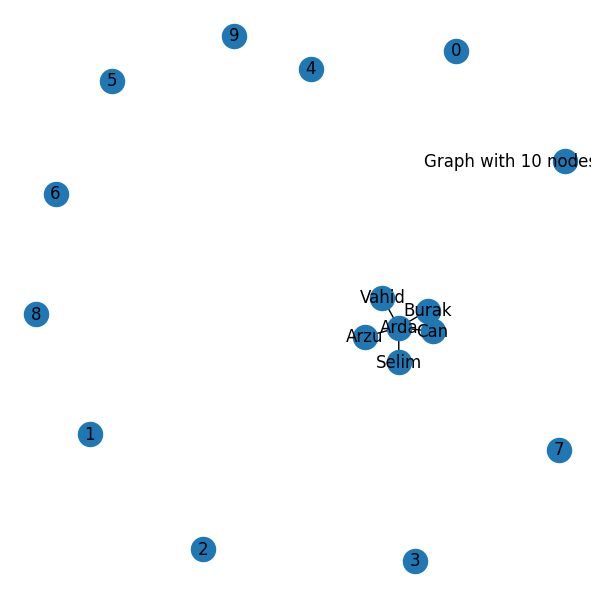

In [ ]:
plt.figure(figsize=(7.5, 7.5))
nx.draw_networkx(G)

The graph `G` now contains `H` as a node.  This flexibility is very powerful as
it allows graphs of graphs, graphs of files, graphs of functions and much more.
It is worth thinking about how to structure your application so that the nodes
are useful entities.  Of course you can always use a unique identifier in `G`
and have a separate dictionary keyed by identifier to the node information if
you prefer.

## Edges

`M` can also be grown by adding one edge at a time,

In [ ]:
M = nx.Graph()

In [ ]:
e = (2, 3)
M.add_edge(*e)  # unpack edge tuple*

by adding a list of edges,

In [ ]:
M.add_edges_from([(1, 2), (1, 3)])

or by adding any ebunch of edges.  An *ebunch* is any iterable
container of edge-tuples.  An edge-tuple can be a 2-tuple of nodes or a 3-tuple
with 2 nodes followed by an edge attribute dictionary, e.g.,
`(2, 3, {'weight': 3.1415})`.  Edge attributes are discussed further
below.

In [ ]:
M.add_edges_from(H.edges)

In [ ]:
M.add_edges_from([(1, 2), (1, 3)])
M.add_node(1)
M.add_edge(1, 2)
M.add_node("spam")        # adds node "spam"
M.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
M.add_edge(3, 'm')

At this stage the graph `G` consists of 15 nodes and 11 edges, as can be seen by:

In [ ]:
M.number_of_nodes()

8

In [ ]:
M.number_of_edges()

4

## Examining elements of a graph

We can examine the nodes and edges. Four basic graph properties facilitate
reporting: `G.nodes`, `G.edges`, `G.adj` and `G.degree`.  These
are set-like views of the nodes, edges, neighbors (adjacencies), and degrees
of nodes in a graph. They offer a continually updated read-only view into
the graph structure. They are also dict-like in that you can look up node
and edge data attributes via the views and iterate with data attributes
using methods `.items()`, `.data()`.
If you want a specific container type instead of a view, you can specify one.
Here we use lists, though sets, dicts, tuples and other containers may be
better in other contexts.

## Degree, Average Degree and Degree Distribution


A key property of each node is its degree, representing the number of links it has to other nodes. The degree can represent the number of mobile phone contacts an individual has in the call graph (i.e. the number of different individuals the person has talked to), or the number of citations a research paper gets in the citation network.

Degree
We denote with $kᵢ$ the degree of the $i^{th}$ node in the network.



In [ ]:
v = list(G.nodes)

In [ ]:
list(G.edges)

[('Arda', 'Burak'),
 ('Arda', 'Selim'),
 ('Arda', 'Arzu'),
 ('Arda', 'Can'),
 ('Arda', 'Vahid'),
 ('Burak', 'Can')]

In [ ]:
G.degree['Vahid']  # the number of edges incident to 1

1

In [ ]:
M.degree([2, 3])

DegreeView({2: 2, 3: 4})

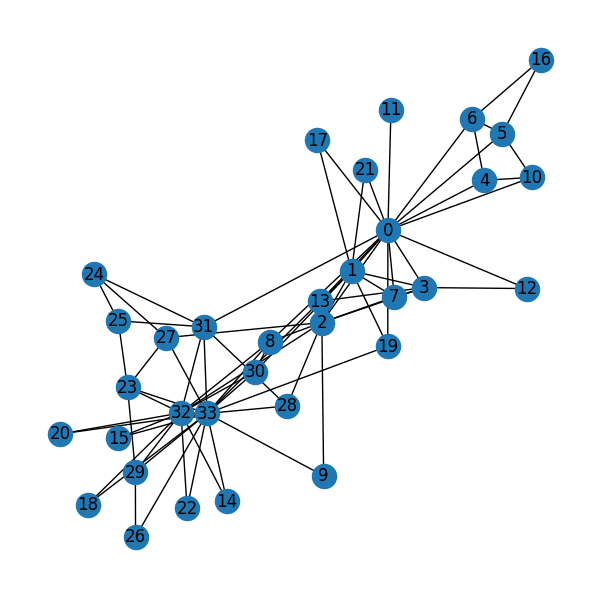

In [ ]:
# create a sample network
F = nx.karate_club_graph()

nx.draw_networkx(F)

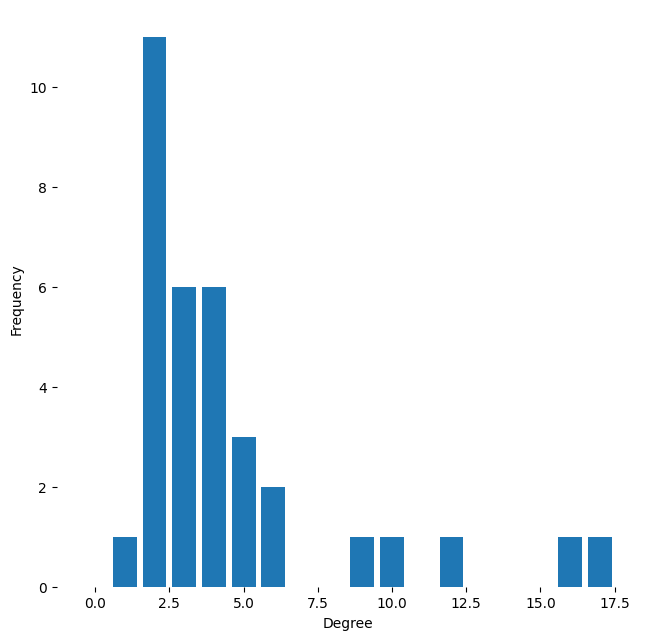

In [ ]:

# calculate degree and average degree
degrees = dict(F.degree())
avg_degree = sum(degrees.values()) / len(degrees)

# plot degree distribution
degree_hist = nx.degree_histogram(F)
plt.bar(range(len(degree_hist)), degree_hist)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


<ipython-input-25-bfc2893eefc2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(degrees.values(), shade=True)


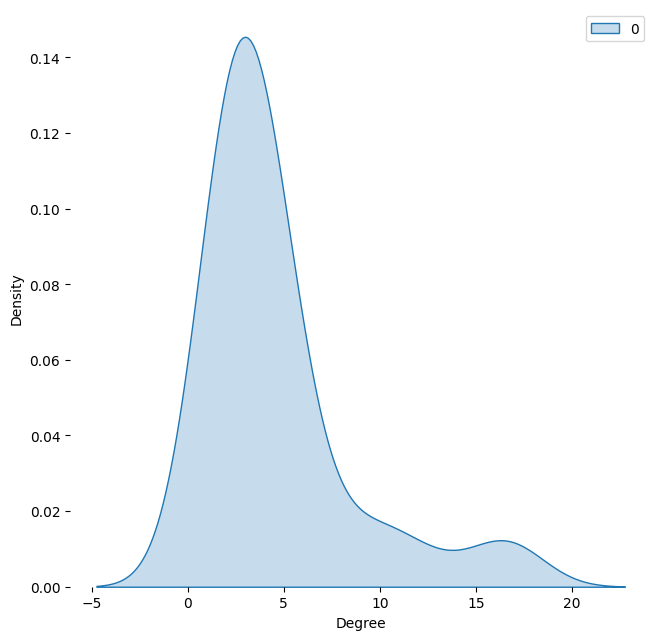

In [ ]:

# plot degree distribution with KDE
sns.kdeplot(degrees.values(), shade=True)
plt.xlabel('Degree')
plt.ylabel('Density')
plt.show()


##Adjacency Matrix

A complete description of a network requires us to keep track of its links. The simplest way to achieve this is to provide a complete list of the links.

he adjacency matrix of a directed network of N nodes has N rows and N columns, its elements being:

$Aij = 1$  if there is a link pointing from node j to node $i$

$Aij = 0$  if nodes i and j are not connected to each other

In [ ]:
adj_df = nx.to_pandas_adjacency(G)

In [ ]:
adj_df

,Arda,Selim,Burak,Can,Arzu,Vahid
Arda,0.0,1.0,1.0,1.0,1.0,1.0
Selim,1.0,0.0,0.0,0.0,0.0,0.0
Burak,1.0,0.0,0.0,1.0,0.0,0.0
Can,1.0,0.0,1.0,0.0,0.0,0.0
Arzu,1.0,0.0,0.0,0.0,0.0,0.0
Vahid,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
list(F.adj[0])  # or list(G.neighbors(1))


[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

One can specify to report the edges and degree from a subset of all nodes
using an nbunch. An *nbunch* is any of: `None` (meaning all nodes),
a node, or an iterable container of nodes that is not itself a node in the
graph.

In [ ]:
M.edges([2, 'm'])


EdgeDataView([(2, 3), (2, 1), ('m', 3)])

## Removing elements from a graph

One can remove nodes and edges from the graph in a similar fashion to adding.
Use methods
`Graph.remove_node()`,
`Graph.remove_nodes_from()`,
`Graph.remove_edge()`
and
`Graph.remove_edges_from()`, e.g.

In [ ]:
M.remove_node(2)
M.remove_nodes_from("spam")


In [ ]:
list(M.nodes)


[3, 1, 0, 4, 5, 6, 7, 8, 9, 'spam']

## Using the graph constructors

Graph objects do not have to be built up incrementally - data specifying
graph structure can be passed directly to the constructors of the various
graph classes.
When creating a graph structure by instantiating one of the graph
classes you can specify data in several formats.

In [ ]:
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
list(H.edges())


[('Arda', 'Burak'),
 ('Arda', 'Selim'),
 ('Arda', 'selin'),
 ('Arda', 'Can'),
 ('Selim', 'Arda'),
 ('Burak', 'Arda'),
 ('Burak', 'Can'),
 ('Can', 'Burak'),
 ('Can', 'Arda'),
 ('selin', 'Arda'),
 (1, 2),
 (2, 1)]

In [ ]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
list(H.edges())


[(0, 1), (1, 2), (2, 3)]

In [ ]:
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
list(H.edges())

[(0, 1), (0, 2), (1, 2)]

## What to use as nodes and edges

You might notice that nodes and edges are not specified as NetworkX
objects.  This leaves you free to use meaningful items as nodes and
edges. The most common choices are numbers or strings, but a node can
be any hashable object (except `None`), and an edge can be associated
with any object `x` using `G.add_edge(n1, n2, object=x)`.

As an example, `n1` and `n2` could be protein objects from the RCSB Protein
Data Bank, and `x` could refer to an XML record of publications detailing
experimental observations of their interaction.

We have found this power quite useful, but its abuse
can lead to surprising behavior unless one is familiar with Python.
If in doubt, consider using `convert_node_labels_to_integers()` to obtain
a more traditional graph with integer labels.

# Accessing edges and neighbors

In addition to the views `Graph.edges`, and `Graph.adj`,
access to edges and neighbors is possible using subscript notation.

In [ ]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]


AtlasView({2: {'color': 'yellow'}})

In [ ]:
G[1][2]
G.edges[1, 2]

{'color': 'yellow'}

You can get/set the attributes of an edge using subscript notation
if the edge already exists.

In [ ]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

Fast examination of all (node, adjacency) pairs is achieved using
`G.adjacency()`, or `G.adj.items()`.
Note that for undirected graphs, adjacency iteration sees each edge twice.

In [ ]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


Convenient access to all edges is achieved with the edges property.

In [ ]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


## Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like,
can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated
attribute dictionary (the keys must be hashable).  By default these are empty,
but attributes can be added or changed using `add_edge`, `add_node` or direct
manipulation of the attribute dictionaries named `G.graph`, `G.nodes`, and
`G.edges` for a graph `G`.

## Graph attributes

Assign graph attributes when creating a new graph

In [ ]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Or you can modify attributes later

In [ ]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

### Node attributes

Add node attributes using `add_node()`, `add_nodes_from()`, or `G.nodes`

In [ ]:
G = nx.karate_club_graph() 

In [ ]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi', 'time': '5pm', 'room': 714}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi', 'time': '2pm'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

In [ ]:
list(G.nodes)

[1, 3]

Note that adding a node to `G.nodes` does not add it to the graph, use
`G.add_node()` to add new nodes. Similarly for edges.

### Edge Attributes

Add/change edge attributes using `add_edge()`, `add_edges_from()`,
or subscript notation.

In [ ]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

The special attribute `weight` should be numeric as it is used by
algorithms requiring weighted edges.



##Directed graphs

The `DiGraph` class provides additional methods and properties specific
to directed edges, e.g.,
`DiGraph.out_edges`, `DiGraph.in_degree`,
`DiGraph.predecessors`, `DiGraph.successors` etc.
To allow algorithms to work with both classes easily, the directed versions of
`neighbors` is equivalent to
`successors` while `degree` reports the sum
of `in_degree` and `out_degree` even though that may feel inconsistent at times.

In [ ]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])


In [ ]:
DG.out_degree(1, weight='weight')


0.5

In [ ]:
list(DG.successors(1))

[2]

In [ ]:
list(DG.neighbors(1))

[2]

Some algorithms work only for directed graphs and others are not well
defined for directed graphs.  Indeed the tendency to lump directed
and undirected graphs together is dangerous.  If you want to treat
a directed graph as undirected for some measurement you should probably
convert it using `Graph.to_undirected()` or with

In [ ]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

## The Graph Class: Working with undirected networks

In NetworkX, the Graph class is used to represent undirected networks and analyze their
structure. The previous chapter showed how to create a network from scratch by adding
nodes and edges. This section will instead use one of the ready-made networks available in
NetworkX: Zachary's karate club (Zachary, 1977).

This network represents the friendships (edges) between members (nodes) of a karate club
studied between 1970 and 1972. This particular karate club has long been of interest to
sociologists and network scientists, because it eventually split into two different clubs after
a disagreement between the instructor and the club president

The karate club network can be created and visualized using the karate_club_graph()
function given as follows:

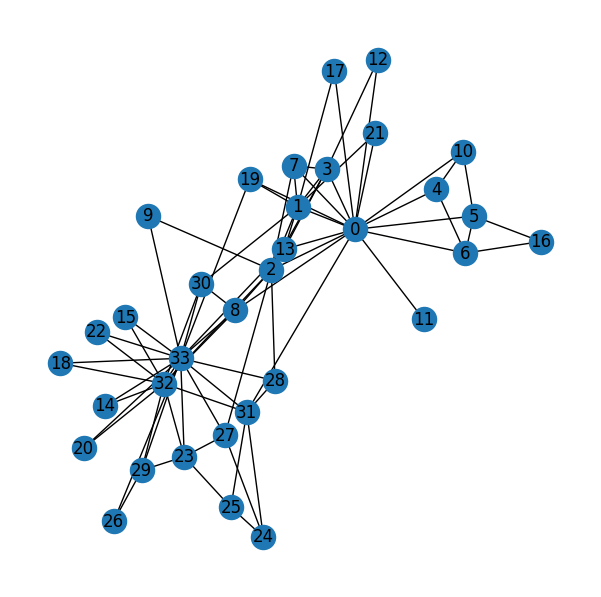

In [ ]:
G = nx.karate_club_graph()
karate_pos = nx.spring_layout(G, k=0.1)
nx.draw_networkx(G, karate_pos)

spring_layout() tries
to place nodes closer together if they are connected by an edge.

The Graph class offers many ways to interact with nodes and edges. The nodes and edges
in a Graph class can be accessed using its nodes and edges attributes. These attributes are
iterables and can be used to iterate over nodes and edges, or converted to a list of node
IDs and edges, demonstrated as follows:

In [ ]:
list(G.nodes)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [ ]:
list(G.edges)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 17),
 (1, 19),
 (1, 21),
 (1, 30),
 (2, 3),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 13),
 (2, 27),
 (2, 28),
 (2, 32),
 (3, 7),
 (3, 12),
 (3, 13),
 (4, 6),
 (4, 10),
 (5, 6),
 (5, 10),
 (5, 16),
 (6, 16),
 (8, 30),
 (8, 32),
 (8, 33),
 (9, 33),
 (13, 33),
 (14, 32),
 (14, 33),
 (15, 32),
 (15, 33),
 (18, 32),
 (18, 33),
 (19, 33),
 (20, 32),
 (20, 33),
 (22, 32),
 (22, 33),
 (23, 25),
 (23, 27),
 (23, 29),
 (23, 32),
 (23, 33),
 (24, 25),
 (24, 27),
 (24, 31),
 (25, 31),
 (26, 29),
 (26, 33),
 (27, 33),
 (28, 31),
 (28, 33),
 (29, 32),
 (29, 33),
 (30, 32),
 (30, 33),
 (31, 32),
 (31, 33),
 (32, 33)]

## Checking for nodes

Another simple way to interact with a network is to check whether a particular node is
present. In Zachary's paper, the node with the 0 ID was identified as the club instructor,
Mr. Hi (a pseudonym). It's easy to confirm that Mr. Hi's node is part of the network using
the Python in operator, or the Graph class's has_node() method, given as follows:

In [ ]:
mr_hi = 0
mr_hi in G

True

In [ ]:
G.has_node(mr_hi)

True

These statements evaluate to True because G contains a node with an ID matching the
given value. If the given value doesn't match any of the node IDs, the statement evaluates
to False as follows:

In [ ]:
wild_goose = 1337
wild_goose in G

False

In [ ]:
G.has_node(wild_goose)

False

## Finding node neighbors

Now that you know that Mr. Hi is part of the network, you can examine his friendships.
Each edge connected to Mr. Hi's node represents one of his friendships. The nodes on the
other end of these edges represent his friends. In general, the set of nodes that are
connected to a particular node by an edge are called that node's neighbors and can be
found using the neighbors() method of the Graph class. The neighbors() method
returns an iterator, which is handy for most uses, but if you just want to see the neighbors,
you can use the list() constructor:

In [ ]:
list(G.neighbors(mr_hi))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

So, Mr. Hi has 16 friends, represented by the preceding node IDs. You can test whether a
given edge exists using either the Python in operator or the Graph class's has_edge()
method. If you just want to know whether Mr. Hi is friends with a particular club member
(say node ID 1), you can use the following code:

In [ ]:
member_id = 1
(mr_hi, member_id) in G.edges

True

In [ ]:
G.has_edge(mr_hi, member_id)

True

The president of the karate club, nicknamed John A., is represented by ID 33. The following
code checks whether he and Mr. Hi are friends:

In [ ]:
john_a = 33
(mr_hi, john_a) in G.edges

False

In [ ]:
G.has_edge(mr_hi, john_a)

False

## Adding attributes to nodes and edges

sometimes,
network nodes and edges are annotated with additional information. In the Graph class,
each node and edge can have a set of attributes to store this additional information.
Attributes can simply be a convenient place to store information related to the nodes and
edges, or they can be used by visualizations and network algorithms.

The Graph class allows you to add any number of attributes to a node. For a G, network,
each node's attributes are stored in the dict at G.nodes[v], where v is the node's ID. In the
karate club example, the club members eventually split into two separate clubs. We can add
an attribute to each node to describe which splinter club the corresponding member joined
after the original club disbanded. The club joined by member i is given by the $i^{th}$ element of
the following list:

In [ ]:
member_club = [
    0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
    0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
    1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
    1, 1, 1, 1]

This information can be added by iterating over all the node IDs and setting the node
attribute based on the value in member_club, as follows:

In [ ]:
for node_id in G.nodes:
    G.nodes[node_id]["club"] = member_club[node_id]

Attributes can also be added automatically when a new node is added by passing keyword
arguments to add_node() after the node ID as follows:

In [ ]:
G.add_node(11, club=0)

Now that the club attribute has been set for all the nodes, it's possible to check the value of
that attribute for individual nodes, shown as follows:

In [ ]:
G.nodes[mr_hi]

{'club': 0}

In [ ]:
G.nodes[john_a]

{'club': 1}

It looks like Mr. Hi and John A really don't get along very well and ended up joining
different clubs. We can visualize these different clubs by using different colors. The list of
node colors can be created by iterating through the nodes and assigning a color based on
their club attribute. That list can then be passed to the draw_networkx() function as
follows:

In [ ]:
node_color = [
    '#1f78b4' if G.nodes[v]["club"] == 0  #bue
    else '#33a02c' for v in G]            #green

In the preceding code, a color is stored in the node_colors list for each node, and passed
to draw_networkx(), which will produce the following:

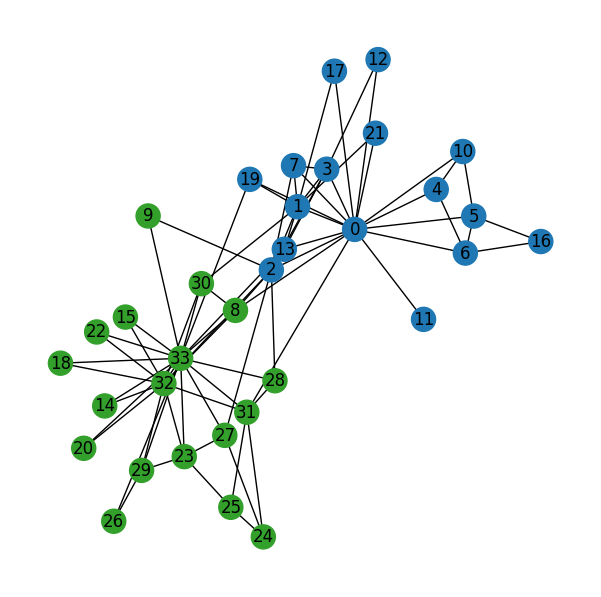

In [ ]:
nx.draw_networkx(G, karate_pos, label=True, node_color=node_color)

Adding attributes to edges works much like it does for nodes. In a G network, an edge's
attributes are stored in the dict at G.edges[v, w], where v and w are the node IDs of the
edge endpoints. Note that since the Graph class represents an undirected network, these
attributes can also be accessed at G.edges[w, v]. You might think that you'd need to
update both separately (if you're prone to anxiety), but NetworkX takes care of that for you.



---






Some of the edges in the karate club network connect members who joined the same
splinter club, while other edges connect members from different splinter clubs. This
information can be stored in the Graph class using edge attributes. To do so, iterate through
all the edges, and check whether the edge endpoints have the same club attribute. In this
example, I create an attribute called internal to represent whether an edge is internal to a
single splinter club. This can be done using the following code:

In [ ]:
# Iterate through all edges
for v, w in G.edges:
    # Compare `club` property of edge endpoints
    # Set edge `internal` property to True if they match
    if G.nodes[v]["club"] == G.nodes[w]["club"]:
        G.edges[v, w]["internal"] = True
    else:
        G.edges[v, w]["internal"] = False

The two types of edges could also be visualized with color, but we'll need color in the next
section, so let's use solid lines for internal edges and dashed lines for external ones instead.
The internal and external edges can be found by iterating through the edges and checking
the internal attribute. Note that rather than using the individual node IDs v and w, this
example references edges using a single e variable, which contains a 2-tuple of node IDs,
given as follows:

In [ ]:
internal = [e for e in G.edges if G.edges[e]["internal"]]
external = [e for e in G.edges if not G.edges[e]["internal"]]

NetworkX can only draw one line style at a time, so multiple line styles requires nodes,
edges, and labels to be drawn separately. While doing so takes more code, it gives more
control over the final output. First, we draw the nodes and node labels, specifying node
colors using the node_color parameter:

Next, we draw the internal and external edges separately, using the style parameter to
draw the external edges as dashed lines:

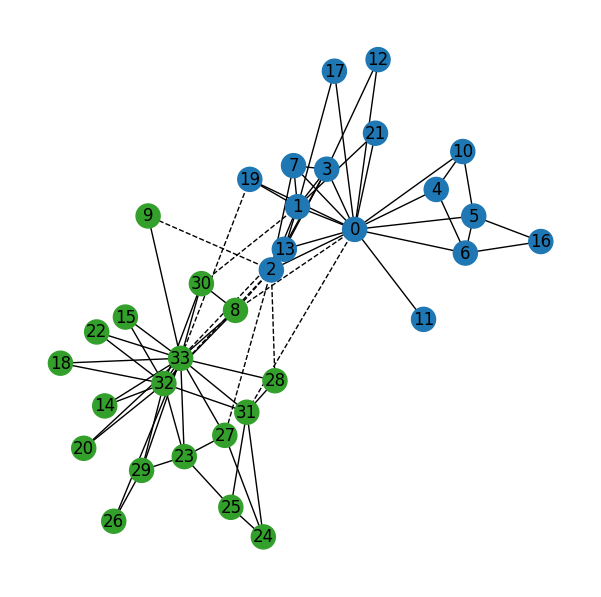

In [ ]:
# Draw nodes and node labels
nx.draw_networkx_nodes(G, karate_pos, node_color=node_color)
nx.draw_networkx_labels(G, karate_pos)
# Draw internal edges as solid lines
nx.draw_networkx_edges(G, karate_pos, edgelist=internal)
# Draw external edges as dashed lines
nx.draw_networkx_edges(G, karate_pos, edgelist=external, style="dashed")

## Adding Edge Weights

Edge weights are handy when connections can have different
strengths and when there is a way to quantify the strength of a connection; for example,
how often two friends talk to each other, the volume of fluid a pipe can transport, or the
number of direct flights between two cities.

The karate club network doesn't have any additional information about the strength of the
edges, but there are relevant properties of those edges that can be calculated, such as the tie
strength. Tie strength increases with the number of neighbors that two nodes have in
common. It is motivated by the observation that closer friends tend to have more friends in
common, and it can often reveal insight into the structure of a social network. The
following code calculates the tie strength using the neighbors() method to find node
neighbors, and Python sets to compute the number of neighbors in common:

*Here, we've defined the tie strength as the number of common neighbors plus one. Why
plus one? A weight of zero conventionally means no edge, so without the extra one, edges
between nodes without common neighbors wouldn't count as edges.*

In [ ]:
def tie_strength(G, v, w):
    # Get neighbors of nodes v and w in G
    v_neighbors = set(G.neighbors(v))
    w_neighbors = set(G.neighbors(w))
    # Return size of the set intersection
    return 1 + len(v_neighbors & w_neighbors)

In NetworkX, any edge attribute can be used as a weight. In the following example, the
weight is just called weight, and is set to the tie strength:

In [ ]:
# Calculate weight for each edge
for v, w in G.edges: 
    G.edges[v, w]["weight"] = tie_strength(G, v, w)
# Store weights in a list
edge_weights = [G.edges[v, w]["weight"] for v, w in G.edges] 

The edge weights can be passed to spring_layout() in order to push strongly connected
nodes even closer together, shown as follows:

In [ ]:
weighted_pos = nx.spring_layout(G, pos=karate_pos, k=0.3, weight="weight")

By specifying the pos parameter of spring_layout(), karate_pos is used as the starting
point of the new layout. Putting all of this together, the following code visualizes the
weighted network:

*To color the edges, the edge weights are passed to draw_networkx(). NetworkX then
generates the colors by mapping them to colors using a color map. In this case, colors range
from light blue (low weight) to dark blue (high weight). The weighted edges are drawn
with a width of eight pixels to make them more visible. The edges are also drawn a second
time on top of the first; this time, one pixel wide and either solid (for internal edges) or
dashed (for external edges). The final visualization will resemble the following:
Tie strength*

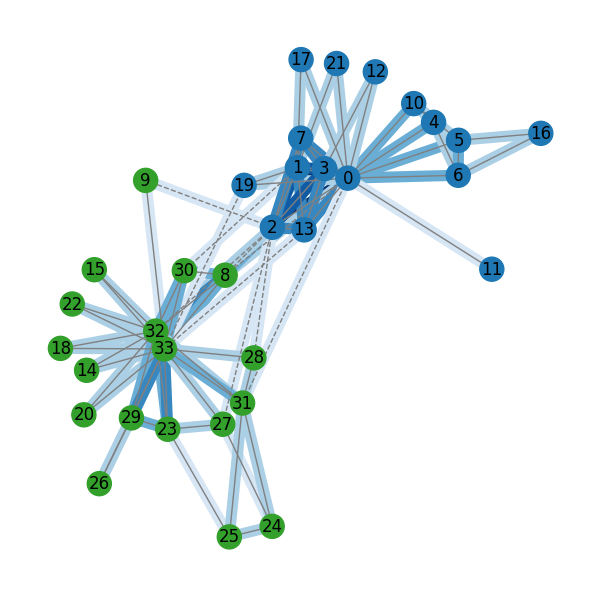

In [ ]:
# Draw network with edge color determined by weight
nx.draw_networkx(
    G, weighted_pos, width=8, node_color=node_color,
    edge_color=edge_weights, edge_vmin=0, edge_vmax=6, edge_cmap=plt.cm.Blues)
# Draw solid/dashed lines on top of internal/external edges
nx.draw_networkx_edges(G, weighted_pos, edgelist=internal, edge_color="gray")
nx.draw_networkx_edges(G, weighted_pos, edgelist=external, edge_color="gray", style="dashed")

The preceding screenshot makes it possible to visualize the strength of friendships, which
splinter club each member joined, and which friendships were divided between clubs.

The friendships that were split between the two new clubs were typically weaker
than others. Mr. Hi (node 0) and John A. (node 33) can both be seen in the center of their
respective club, suggesting that they played an important role in the break-up of the
original club and the formation of the new ones.

## The DiGraph Class: When direction matters

So far, all of the edges in this section ter have been undirected, with no difference between an
edge from A to B, and an edge from B to A. But not all relationships in life are so
symmetric. If an employee-boss relationship is described by an undirected edge, it suggests
that the employee can fire the boss as easily as the other way around. While possibly good
for workplace morale, such arrangements aren't the norm. NetworkX supports directed
edges through the DiGraph (directed graph) class.

A network is called directed (or digraph) if all of its links are directed; it is called undirected if all of its links are undirected.

This section will use another social network as an example: the friendships among
adolescent students in a Dutch classroom, collected by Andrea Knecht (Knecht, 2008).
Knecht's friendship network differs from Zachary's karate club because students were
asked to list their friends, but there was no requirement that their friends listed them in
return. In other words, the network is directed! The network data is available online and
included along with the code for this book for convenience. The network can be loaded and
visualized using the following code:

In [ ]:
G = nx.read_gexf("/content/drive/MyDrive/NS_Recitation /klas12b-net-1.gexf", node_type=int)
student_pos = nx.spring_layout(G, k=1.5)
nx.draw_networkx(G, student_pos, arrowsize=10)

FileNotFoundError: ignored

The arrowsize parameter of draw_networkx() is used to increase the size of arrows on
directed edges, making them easier to see. This code produces the following visualization:

In a directed network, there is not just one type of neighbor, there are two! A node can be
connected to others by either incoming or outgoing edges (or both). Incoming edges
connect a node to its predecessors, while outgoing edges connect a node to its successors.

In [ ]:
list(G.neighbors(0))

In [ ]:
list(G.successors(0))

In [ ]:
list(G.predecessors(0))

Do you miss undirected networks yet? If so, DiGraph provides the to_undirected()
method to create an undirected copy of itself, returning a Graph. By default, the new Graph
will have an undirected edge between two nodes if a directed edge existed in either
direction in the original DiGraph. However, if the reciprocal parameter is set to True,
undirected edges will only be created if directed edges exist in both directions. Both
options are visualized by the following code:

The preceding code produces two visualizations, one which includes non-reciprocated
edges (left) and one which includes only reciprocated edges (right):

In [ ]:
# Create undirected copies of G
G_either = G.to_undirected()
G_both = G.to_undirected(reciprocal=True)
# Set up a figure
plt.figure(figsize=(10,5))
# Draw G_either on left
plt.subplot(1, 2, 1)
nx.draw_networkx(G_either, student_pos)
# Draw G_both on right
plt.subplot(1, 2, 2)
nx.draw_networkx(G_both, student_pos)

## Graph Ggenerators and Graph Operations

In addition to constructing graphs node-by-node or edge-by-edge, they
can also be generated by

* Applying classic graph operations, such as:

like so:

In [ ]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

### Using a stochastic graph generator

like so:

In [ ]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

## Reading a graph stored in a file using common graph formats

NetworkX supports many popular formats, such as edge lists, adjacency lists,
GML, GraphML, LEDA and others.

In [ ]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

For details on graph formats see Reading and writing graphs
and for graph generator functions see Graph generators

 Analyzing graphs

The structure of `G` can be analyzed using various graph-theoretic
functions such as:

In [ ]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))


In [ ]:
sorted(d for n, d in G.degree())


Some functions with large output iterate over (node, value) 2-tuples.
These are easily stored in a [dict](https://docs.python.org/3/library/stdtypes.html#dict) structure if you desire.

In [ ]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[2]


## Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with
Matplotlib as well as an interface to use the open source Graphviz software
package are included.  These are part of the networkx.drawing
module and will be imported if possible.

First import Matplotlib’s plot interface (pylab works too)

In [ ]:
import matplotlib.pyplot as plt

To test if the import of `nx_pylab` was successful draw `G`
using one of

In [ ]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [ ]:
options = {
    'node_color': 'blue',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

You can find additional options via `draw_networkx()` and
layouts via the `layout module`.
You can use multiple shells with `draw_shell()`.

In [ ]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

To save drawings to a file, use, for example

In [ ]:
nx.draw(G)
plt.savefig("path.png")

## From Data to Networks

To analyze a system using NetworkX, that system must first be modeled as a network, and
then be represented as an object within NetworkX. This section explains the basic process
of creating network representations of data.

## Reading and Writing Network Files

NetworkX provides support for reading and writing many network file formats. Of course,
if a network has been provided in one of these formats, it will be very easy to load into
NetworkX! But, even if you have data in another format, it is often possible to convert it to
one of the supported formats without too much difficulty (I would guess that 90% of
network science work is converting data between formats most of the rest is complaining
about converting data).


### Edge list

The edge list format is a simple but useful plain-text format. It supports edge attributes, but
not node attributes. Edge lists are read and written with the read_edgelist() and
write_edgelist() functions. Each line of an edge list network contains the IDs of two
nodes, representing an edge. Here is the content of a sample edge list network, representing
a fictional subway system:

```
# Example edge list network
# source target
Winegroom Uptown
Winegroom Strawshop
Uptown Strawshop
Uptown Amazelake
Strawshop Province
```

Lines starting with # are comments, and are ignored by NetworkX. By default, NetworkX
will interpret any whitespace as the end of a node ID and the start of a new one. If you
would like to have whitespace in a node ID, you can use the delimiter parameter to specify
a different delimiter, such as the "\t" tab character.

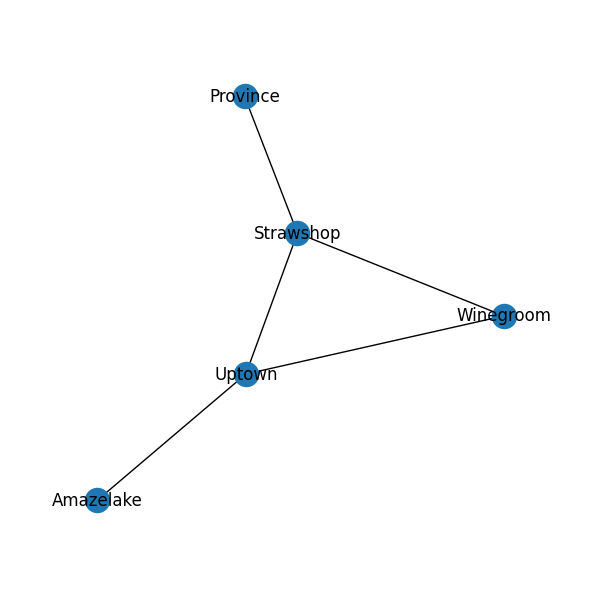

In [ ]:
# Create data directory path
from pathlib import Path
# data_dir = Path('/content/drive/MyDrive/NS_Recitation') / 'data'
# Read edge list
G = nx.read_edgelist('/content/drive/MyDrive/NS_Recitation /data/example.edgelist')
# Draw network
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.gca().margins(0.15, 0.15)

Notice that NetworkX assumed the edge list represents an undirected network and
returned a Graph class accordingly. If a network is directed, the read_edgelist()
function can also return a DiGraph class. The only necessary change is that the DiGraph
class must be passed as the create_using parameter. For directed networks, the first node
on each line of the edge list will be interpreted as the source and the second as the target.
The modified code for directed networks is as follows:

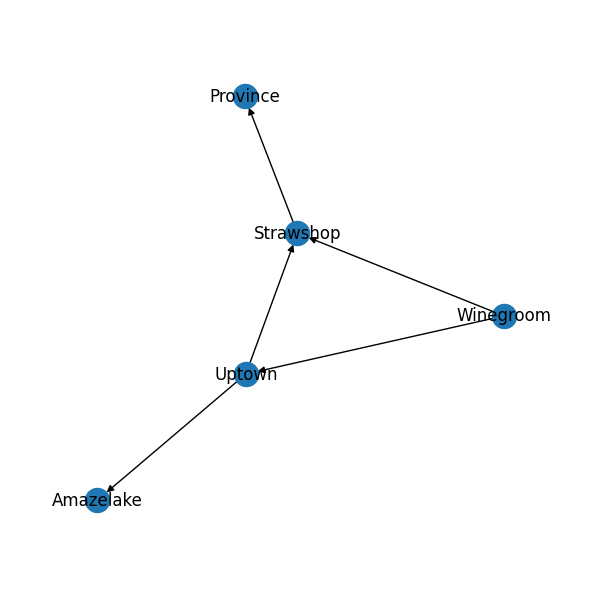

In [ ]:
# Read edge list
G = nx.read_edgelist('/content/drive/MyDrive/recitation_network data analysis/Network Data/example.edgelist',
create_using=nx.DiGraph)
# Draw network
nx.draw_networkx(G, pos)
plt.gca().margins(0.15, 0.15)

### Weighted edge list

The edge list format also supports weighted edges. Edge weights can be specified by
adding a number as the third entry on each line of the edge list and using
read_weighted_edgelist() to read the file. The weight will automatically be added to
an edge attribute called weight. With these changes, the example network file now looks
like this:

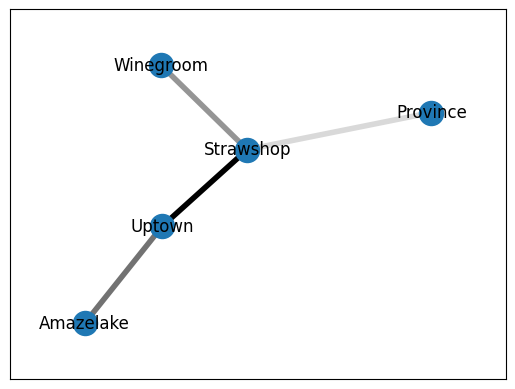

In [ ]:
# Read edge list
G = nx.read_weighted_edgelist('/content/drive/MyDrive/recitation_network data analysis/Network Data/weighted.edgelist')
# Extract weights
weights = [d['weight'] for s, t, d in G.edges(data=True)]
# Draw network
pos = nx.spring_layout(G)
ax = plt.subplot(111)
nx.draw_networkx(
    G, pos, width=4, edge_color=weights, edge_cmap=plt.cm.Greys)
ax.margins(0.15, 0.15)

### Edge list with edge attributes

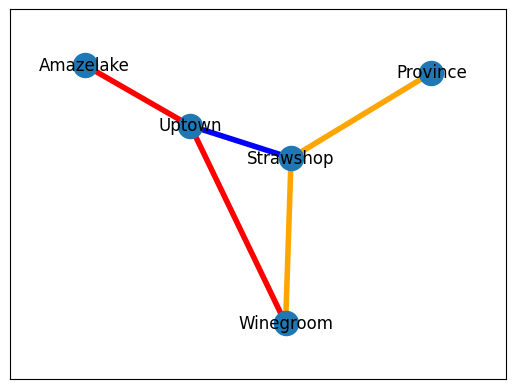

In [ ]:
# Read edge list
G = nx.read_edgelist('/content/drive/MyDrive/recitation_network data analysis/Network Data/attributes.edgelist',
    data=[('weight', float), ('color', str)])
# Extract colors
colors = [d['color'] for s, t, d in G.edges(data=True)]
# Draw network
ax = plt.subplot(111)
nx.draw_networkx(
    G, pos, width=4, edge_color=colors)
ax.margins(0.15, 0.15)

### Adjacency list

Sometimes attributes aren't necessary and it's convenient to have a simple, compact, plaintext
representation of a network. In these cases, the adjacency list format is a good
alternative to edge lists. In an adjacency list file, multiple nodes are listed on each line.
NetworkX creates an edge from the first node on each line to each of the subsequent nodes
on that line. As with edge lists, these edges can be directed or undirected. One of the
benefits to the adjacency list format is brevity. Most edges can be specified by adding a
single term, rather than two. The drawback is the inability to specify edge attributes.
Sticking with the subway example, the adjacency list representation is as follows:



```
# Example adjacency list network
# source target1 target2 ...
Winegroom Uptown Strawshop
Uptown Strawshop Amazelake Winegroom
Strawshop Winegroom
```



This file can be turned into a network using the following code. No need to plot the
output—it's the exact same network as before:



In [ ]:
# Read adjacency list
G_adj = nx.read_adjlist('/content/drive/MyDrive/recitation_network data analysis/Network Data/example.adjlist')

### Export to Gephi with GEXF format 

One useful format for working with node attributes is GEXF. GEXF is an XML-based
format that is also used by other free/open-source network tools, such as the Gephi
visualization application. The added complexity of the GEXF format makes it possible for
node and edge attributes to be handled automatically by read_gexf() and
write_gexf(). Exporting a network as GEXF is as simple as this:

Because I have specified sys.stdout as the output file, the preceding code will write the
output to the screen, rather than to a file. The output is given as follows for reference. I
won't describe it in detail, but skimming it should give you a sense of how nodes, edges,
and attributes are represented in GEXF:

In [ ]:
for v in G.nodes:
    G.nodes[v]['abbreviation'] = v[0]
import sys
nx.write_gexf(G, sys.stdout)

<?xml version='1.0' encoding='utf-8'?>
<gexf xmlns="http://www.gexf.net/1.2draft" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.gexf.net/1.2draft http://www.gexf.net/1.2draft/gexf.xsd" version="1.2">
  <meta lastmodifieddate="2023-04-25">
    <creator>NetworkX 3.1</creator>
  </meta>
  <graph defaultedgetype="directed" mode="static" name="">
    <attributes mode="static" class="node">
      <attribute id="0" title="abbreviation" type="string" />
    </attributes>
    <nodes>
      <node id="Winegroom" label="Winegroom">
        <attvalues>
          <attvalue for="0" value="W" />
        </attvalues>
      </node>
      <node id="Uptown" label="Uptown">
        <attvalues>
          <attvalue for="0" value="U" />
        </attvalues>
      </node>
      <node id="Strawshop" label="Strawshop">
        <attvalues>
          <attvalue for="0" value="S" />
        </attvalues>
      </node>
      <node id="Amazelake" label="Amazelake">
        <attval

### to JSON

there are also several JSON-based formats available in NetworkX. These formats
also support node attributes. In addition to being considerably more compact than GEXF,
these formats are very convenient when working with JavaScript or ECMAScript, for
example, when using the d3.js visualization library.

In [ ]:
nx.node_link_data(G)

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'abbreviation': 'W', 'id': 'Winegroom'},
  {'abbreviation': 'U', 'id': 'Uptown'},
  {'abbreviation': 'S', 'id': 'Strawshop'},
  {'abbreviation': 'A', 'id': 'Amazelake'},
  {'abbreviation': 'P', 'id': 'Province'}],
 'links': [{'source': 'Winegroom', 'target': 'Uptown'},
  {'source': 'Winegroom', 'target': 'Strawshop'},
  {'source': 'Uptown', 'target': 'Strawshop'},
  {'source': 'Uptown', 'target': 'Amazelake'},
  {'source': 'Strawshop', 'target': 'Province'}]}

#Centrality Metrics and Network Properties

## The Small Scale: Nodes and Centrality#


The topics in this chapter include the following:




1.   Centrality: Quantifying a node's structural properties using centrality measures
2.   Betweenness centrality: Identifying nodes that act like bridges using betweenness centrality
3. Eigenvector centrality: Identifying highly-connected nodes using eigenvector centrality
4. Closeness centrality: Quantifying the distance between a node and the rest of the network using closeness centrality
5. Local clustering: Quantifying the interconnectedness of a node's neighborhood

 *The example in this section is a covert network, namely that of British suffragettes in the
early 20th century. Covert networks occur in systems where membership is meant to be
secret, as might be the case when members fear retaliation from an oppressive regime.
These networks are particularly interesting to study because there is a tension between the
need for secrecy and the need to spread information throughout the network. The
following example comes from the arrest records of British suffragettes (Edwards &
Crossley, 2009).*



**These records form an affiliation network between individuals and mass arrest events.**

The following code loads the data, constructs an affiliation network, and projects it into a
co-affiliation network containing only person nodes:

In [ ]:
# Create empty affiliation network and list of people
B = nx.Graph()
people = set()
# Load data file into network
from pathlib import Path
data_dir = Path('.') / 'data'
with open('/content/drive/MyDrive/recitation_network data analysis/Network Data/50_ALL_2M.csv') as f:
    # Parse header
    events = next(f).strip().split(",")[1:]
    # Parse rows
    for row in f:
        parts = row.strip().split(",")
        person = parts[0]
        people.add(person)
        for j, value in enumerate(parts[1:]):
            if value != "0":
                B.add_edge(person, events[j], weight=int(value))
# Project into person-person co-affilation network
from networkx import bipartite
G = bipartite.projected_graph(B, people)

###Betweenness Centrality

In graph theory, betweenness centrality is a measure of centrality in a graph based on shortest paths. For every pair of vertices in a connected graph, there exists at least one shortest path between the vertices such that either the number of edges that the path passes through (for unweighted graphs) or the sum of the weights of the edges (for weighted graphs) is minimized. The betweenness centrality for each vertex is the number of these shortest paths that pass through the vertex.

 *source:* https://en.wikipedia.org/wiki/Betweenness_centrality

With the network loaded into NetworkX, the following code calculates the betweenness
centrality and shows the 10 individuals with the highest value:


In [ ]:
betweenness = nx.betweenness_centrality(G, normalized=False)
sorted(betweenness.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Maud Joachim', 52896.53324605239),
 ('Ada Wright', 26344.263264276866),
 ('Patricia Woodlock', 24774.923422322427),
 ('Emily Duval', 19517.906214119506),
 ('Mary Leigh', 19404.22583377209),
 ('Mabel Capper', 18221.36281158174),
 ('Sylvia Pankhurst', 18127.596886368963),
 ('Elsie Evans', 15674.806298703466),
 ('Winifred Mayo', 15600.989680321361),
 ('Vera Wentworth', 13233.504078942538)]

High betweenness centralities suggest that these individuals were important information
brokers in the suffragette movement, and indeed, they were all notable suffragettes.

![picture](https://kids.kiddle.co/images/7/71/William_Blathwayt_and_Maud_Joachim.jpg)

Maud Joachim (right) and William Blathwayt planting a tree at Eagle House in 1910


###Hubs – Eigenvector centrality

In graph theory, eigenvector centrality (also called eigencentrality or prestige score) is a measure of the influence of a node in a network. Relative scores are assigned to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. A high eigenvector score means that a node is connected to many nodes who themselves have high scores.

Google's PageRank and the Katz centrality are variants of the eigenvector centrality.

 *source:* https://en.wikipedia.org/wiki/Eigenvector_centrality

In NetworkX, the eigenvector_centrality() function can be used to calculate
eigenvector centrality. As with other centrality measures, this function returns a dict that
maps node IDs to centrality values. The following example applies this function to the
suffragette network and prints the top 10 hubs in the network:


In [ ]:
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Maud Joachim', 0.11587964174472974),
 ('Caroline A Downing', 0.11437066100686202),
 ('Kitty Marion', 0.11344996012448638),
 ('Mabel Capper', 0.10991776240126287),
 ('Annie Bell', 0.10834705221110301),
 ('Grace Chappelow', 0.1081818524424996),
 ('Winifred Mayo', 0.10803831965810345),
 ('Ellen Pitfield', 0.10518714292397997),
 ('Dorothy Agnes Bowker', 0.10493919222545889),
 ('Mrs Maud Fussell', 0.10490326319130666)]

Just as before, these are all notable activists from the suffragette movement. Some of these
individuals also appeared in the previous section, including the most central, Maud
Joachim. However, some of the individuals with high eigenvector centrality don't have
particularly high betweenness centrality, such as Caroline A. Downing. Individuals with
high eigenvector centrality create **many short paths between others**,    *but not necessarily the
shortest paths*.

### Closeness Centrality

The measure known as closeness centrality is one of the oldest centrality measures used in
network science, proposed by the sociologist, Alex Bavelas, in 1950. 

In a connected graph, closeness centrality (or closeness) of a node is a measure of centrality in a network, calculated as the reciprocal of the sum of the length of the shortest paths between the node and all other nodes in the graph. Thus, the more central a node is, the closer it is to all other nodes.

The following example uses the NetworkX closeness_centrality() function to
calculate the closeness centrality values for the suffragette network and display the top 10:

In [ ]:
closeness = nx.closeness_centrality(G)
sorted(closeness.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Maud Joachim', 0.5357241748956739),
 ('Winifred Mayo', 0.5009438937877011),
 ('Caroline A Downing', 0.5009438937877011),
 ('Mabel Capper', 0.5006919099377073),
 ('Kitty Marion', 0.49793672684150186),
 ('Ada Wright', 0.4898501559823633),
 ('Patricia Woodlock', 0.4886477746471095),
 ('Vera Wentworth', 0.48769011119851163),
 ('Evelyn Whurry', 0.4874512815652116),
 ('Annie Bell', 0.4869743233640714)]

Nearly everyone in this list appears in at least one of the other top 10 lists, but only Maud
Joachim, Winifred Mayo, and Mabel Capper appear in all three. Once again, Maud Joachim
comes out on top, clearly an important figure in the suffragette movement, despite not
being less well-known than some other suffragettes who didn't make these lists. It is
perhaps an important lesson that the important structural roles played by brokers and hubs
in a network are easily and often obscured.

###Local clustering

It is often
useful to consider whether a node's neighbors tend to be connected to each other. In a social
network, this question translates to asking whether the friend of a friend is also your friend,
a property known as transitivity. The
result of such relationships are triangles: three nodes, all mutually connected. The tendency
for such triangles to arise is called clustering.


Clustering is measured via the local clustering coefficient, defined
as the fraction of all pairs of a node's neighbors that have an edge between them.




Clustering coefficient: A measure of the degree to which
nodes in a graph tend to cluster together. The global version
was designed to give an overall indication of the clustering
in the network, whereas the local clustering coef. gives an
indication of the embeddedness of single nodes.

In NetworkX, the number of triangles between a node and its neighbors can be calculated
using the triangles() function. The local clustering coefficient can be found using the
clustering() function. The following example finds the nodes with the most triangles:

In [ ]:
triangles = nx.triangles(G)
sorted(triangles.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Maud Joachim', 19687),
 ('Caroline A Downing', 18201),
 ('Kitty Marion', 17696),
 ('Mabel Capper', 16811),
 ('Winifred Mayo', 16455),
 ('Annie Bell', 16065),
 ('Grace Chappelow', 16018),
 ('Ellen Pitfield', 14910),
 ('Mrs Maud Fussell', 14841),
 ('Dorothy Agnes Bowker', 14750)]

Now, we can use clustering() to find the local clustering coefficient for these nodes:

In [ ]:
clustering = nx.clustering(G)
[(x, clustering[x]) for x in sorted(people, key=lambda x:eigenvector[x], reverse=True)[0:10]]

[('Maud Joachim', 0.23595330552759),
 ('Caroline A Downing', 0.34999903851700864),
 ('Kitty Marion', 0.3670988486671507),
 ('Mabel Capper', 0.33992518451117176),
 ('Annie Bell', 0.4233201581027668),
 ('Grace Chappelow', 0.43461037551551984),
 ('Winifred Mayo', 0.3480477177545582),
 ('Ellen Pitfield', 0.4828993392926545),
 ('Dorothy Agnes Bowker', 0.5058125578683859),
 ('Mrs Maud Fussell', 0.5006071645415908)]

Unsurprisingly, Maud Joachim shows up as having the highest centrality in terms of
triangles. More surprisingly, these top nodes have local clustering coefficients in roughly
the 25%-50% range, while the nodes in the network span the entire 0%—100% range. The
three individuals common to the top 10 lists for all centrality measures have local clustering
coefficients ranging from 24%-35%. If an individual's local clustering coefficient is low, it
suggests they aren't well-connected. If the coefficient is high, it suggests that an individual's
connections are redundant.

## The Big Picture: Describing Networks

Large-scale structures can vary widely from network to network. These differences are
often indicative of different types of networks (for example, social versus technological).
Large-scale structures can also have important implications for functional properties, such
as resilience to errors and attack.

### Data Sets

This section explores large-scale network structures using a variety of example networks.

The first of these is the familiar karate club network (Zachary, 1977) This network is representative of social networks. As
usual, the karate club network can be loaded directly from NetworkX




In [ ]:
# Load karate club network
G_karate = nx.karate_club_graph()
mr_hi = 0
john_a = 33



The second example used in this chapter is the German electrical grid (Mureddu, 2016).
Nodes in this network represent electrical generators and transformers. Edges represent
high-voltage lines used to transport electricity. Because each node in this network
corresponds to a physical space, most connections are located between geographically
nearby nodes. This local structure is common across infrastructure networks. The following
code loads the network from an edge list formatted file:

In [ ]:
# Load Germany electrical grid
with open('/content/drive/MyDrive/recitation_network data analysis/Network Data/branches.csv', 'rb') as f:
    # Skip header
    next(f)
    # Read edgelist format
    G_electric = nx.read_edgelist(
        f,
        delimiter="\t",
        create_using=nx.Graph,
        data=[('X', float), ('Pmax', float)])

The third and final example is a telecommunication network. Specifically, the example is
the European GÉANT network. GÉANT connects research and educational networks across
Europe. The nodes in this network correspond to points of presence, while the edges
correspond to high-capacity telecommunication links. The following code loads the
network from a GraphML formatted file:

In [ ]:
# Load internet point of presence network
G_internet = nx.read_graphml('/content/drive/MyDrive/recitation_network data analysis/Network Data/Geant2012.graphml')

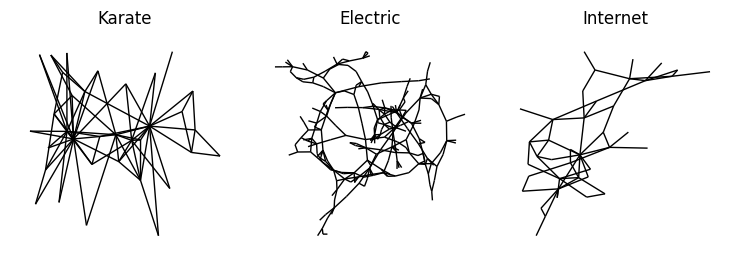

In [ ]:
plt.figure(figsize=(7.5, 2.75))
plt.subplot(1, 3, 1);
plt.title("Karate")
nx.draw_networkx(G_karate, node_size=0, with_labels=False)
plt.subplot(1, 3, 2)
plt.title("Electric")
nx.draw_networkx(G_electric, node_size=0, with_labels=False)
plt.subplot(1, 3, 3)
plt.title("Internet")
nx.draw_networkx(G_internet, node_size=0, with_labels=False)
plt.tight_layout()

### Diameter and Shortest Paths

befor analyzing these three network lets take a look at the basic meaning of the paths 

####Paths

Let's start with a very simple, undirected network.

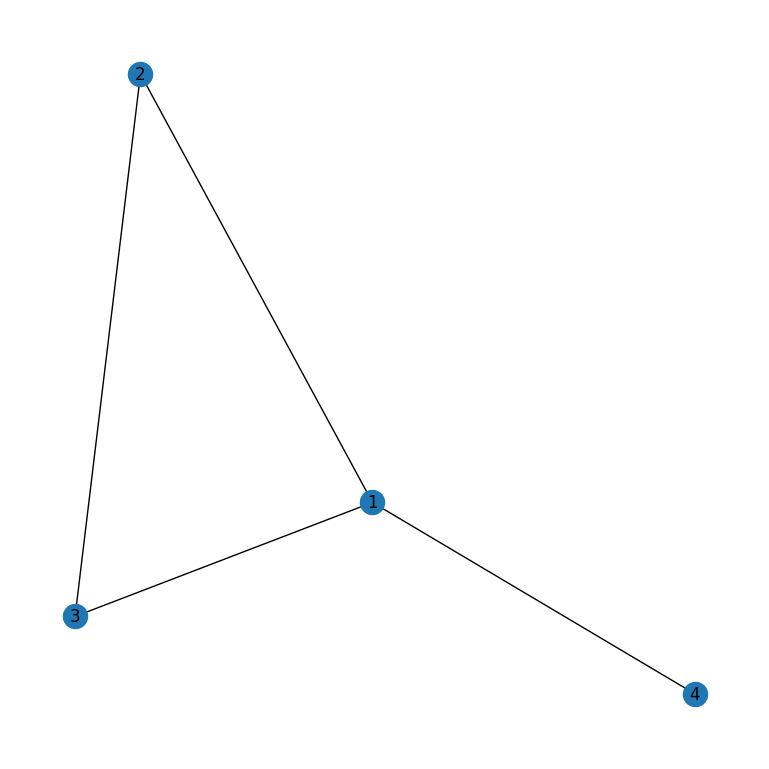

In [ ]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4])

G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])

nx.draw(G, with_labels=True)

A *path* in a network is a sequence of edges connecting two nodes. In this simple example, we can easily see that there is indeed at least one path that connects nodes 3 and 4. We can verify this with NetworkX:

In [ ]:
nx.has_path(G, 3, 4)

There can be more than one path between two nodes. Again considering nodes 3 and 4, there are two such "simple" paths:

In [ ]:
list(nx.all_simple_paths(G, 3, 4))

A simple path is one without any cycles. If we allowed cycles, there would be infinitely many paths because one could always just go around the cycle as many times as desired.

We are often most interested in *shortest* paths. In an unweighted network, the shortest path is the one with the fewest edges. We can see that of the two simple paths between nodes 3 and 4, one is shorter than the other. We can get this shortest path with a single NetworkX function:

In [ ]:
nx.shortest_path(G, 3, 4)

If you only care about the path length, there's a function for that too:

In [ ]:
nx.shortest_path_length(G, 3, 4)

Note that a path length is defined here by the number of *edges* in the path, not the number of nodes, which implies

    nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1
    
for nodes $u$ and $v$.

### Connected components

In the simple network above, we can see that for *every* pair of nodes, we can find a path connecting them. This is the definition of a *connected* graph. We can check this property for a given graph:

In [ ]:
nx.is_connected(G)

Not every graph is connected:

In [ ]:
G = nx.Graph()

nx.add_cycle(G, (1,2,3))
G.add_edge(4,5)

nx.draw(G, with_labels=True)

In [ ]:
nx.is_connected(G)

And NetworkX will raise an error if you ask for a path between nodes where none exists:

In [ ]:
nx.has_path(G, 3, 5)

In [ ]:
nx.shortest_path(G, 3, 5)

Visually, we can identify two connected components in our graph. Let's verify this:

In [ ]:
nx.number_connected_components(G)

The `nx.connected_components()` function takes a graph and returns a list of sets of node names, one such set for each connected component. Verify that the two sets in the following list correspond to the two connected components in the drawing of the graph above:

In [ ]:
list(nx.connected_components(G))

In case you're not familiar with Python sets, they are collections of items without duplicates. These are useful for collecting node names because node names should be unique. As with other collections, we can get the number of items in a set with the `len` function:

In [ ]:
components = list(nx.connected_components(G))
len(components[0])

We often care about the largest connected component, which is sometimes referred to as the *core* of the network. We can make use of Python's builtin `max` function in order to obtain the largest connected component. By default, Python's `max` function sorts things in lexicographic (i.e. alphabetical) order, which is not helpful here. We want the maximum connected component when sorted in order of their sizes, so we pass `len` as a key function:

In [ ]:
max(nx.connected_components(G), key=len)

While it's often enough to just have the list of node names, sometimes we need the actual subgraph consisting of the largest connected component. One way to get this is to pass the list of node names to the `G.subgraph()` function:

In [ ]:
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)

nx.draw(core, with_labels=True)

Those of you using tab-completion will also notice a `nx.connected_component_subgraphs()` function. This can also be used to get the core subgraph but the method shown is more efficient when you only care about the largest connected component.

####Shortest path

In graph theory, the shortest path problem is the problem of finding a path between two vertices (or nodes) in a graph such that the sum of the weights of its constituent edges is minimized.

NetworkX provides several convenient functions for finding distances and shortest paths.
The shortest paths between two particular nodes can be found using the
all_shortest_paths() function:

In [ ]:
list(nx.all_shortest_paths(G_karate, mr_hi, john_a))

[[0, 8, 33], [0, 13, 33], [0, 19, 33], [0, 31, 33]]

If you only need to know the distance, the shortest_path_length() function will
provide that:

In [ ]:
nx.shortest_path(G_karate, mr_hi, john_a)

In [ ]:
nx.shortest_path_length(G_karate, mr_hi, john_a)

2

On the other hand, the distance between all node pairs can be found using the
shortest_path_length() function. This function produces an iterator that can be turned
into a dict of dict objects, with the keys of the first corresponding to source node IDs, and
the keys of the second corresponding to target node IDs. The following example finds all
distances in the karate club network and uses the resulting dict object to find the distance
between John A. and Mr. Hi:

In [ ]:
# Calculate dictionary of all shortest paths
length_source_target = dict(nx.shortest_path_length(G_karate))
length_source_target[0][33]

Networks can be characterized according to their distribution of shortest path lengths. The
following function draws a histogram of all shortest path lengths within a network:

In [ ]:
def path_length_histogram(G, title=None):
    # Find path lengths
    length_source_target = dict(nx.shortest_path_length(G))
    # Convert dict of dicts to flat list
    all_shortest = sum(
        [list(length_target.values()) for length_target in length_source_target.values()],
        [])
    # Calculate integer bins
    high = max(all_shortest)
    bins = [-0.5 + i for i in range(high + 2)]
    # Plot histogram
    plt.hist(all_shortest, bins=bins, rwidth=0.8)
    plt.title(title)
    plt.xlabel("Distance")
    plt.ylabel("Count")

Now, let's compare the path length distributions of the three example networks:

The preceding code uses path_length_histogram() to visualize the distribution of
shortest path lengths in the three example networks:

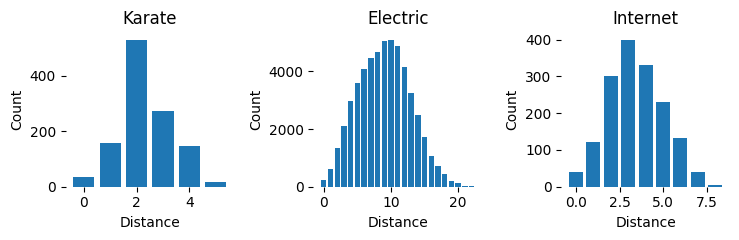

In [ ]:
plt.figure(figsize=(7.5, 2.5))
plt.subplot(1, 3, 1)
path_length_histogram(G_karate, title="Karate")
plt.subplot(1, 3, 2)
path_length_histogram(G_electric, title="Electric")
plt.subplot(1, 3, 3)
path_length_histogram(G_internet, title="Internet")
plt.tight_layout()

The karate club and internet networks both have very small path lengths, while the
electrical network has much larger lengths. Social networks tend to have short paths,
known as the small world phenomenon. Infrastructure networks such as the electrical grid
have longer paths because high voltage lines are costly, and are only used to connect
nearby points. While the internet network is also infrastructural, it is composed of
interconnected long-distance links that help information move quickly across long
distances. These redundant long-distance links result in smaller path lengths than other
infrastructure networks.

While informative, the full path length distributions are a bit unwieldy, so it is helpful to
use summary measures. One such measure is the mean shortest path length, also known as
the characteristic length, which can be calculated as follows:

In [ ]:
nx.average_shortest_path_length(G_karate)

2.408199643493761

In [ ]:
nx.average_shortest_path_length(G_electric)

9.044193487671748

In [ ]:
nx.average_shortest_path_length(G_internet)

3.528205128205128

###Network Diameter
The diameter of a network, denoted by $dmax$, is the maximum shortest path in the network. In other words, it is the largest distance recorded between any pair of nodes

Alternatively, the size of a network can, instead, be characterized by the largest path
length—called the diameter. The diameters of the three example networks can be found
using the diameter() function:

In [ ]:
nx.diameter(G_karate)

5

In [ ]:
nx.diameter(G_electric)

22

In [ ]:
nx.diameter(G_internet)

8

The preceding results are larger than the mean shortest path lengths, but give a similar
overall picture of the relative sizes of the networks.
Unlike the mean shortest path length, the diameter only depends on a single path. As a
result, a single outlier can greatly increase the diameter. However, it can be a good measure
of the worst case path length.

###Global clustering coefficient

The global clustering coefficient is based on triplets of nodes. A triplet is three nodes that are connected by either two (open triplet) or three (closed triplet) undirected ties.

The global clustering coefficient is the number of closed triplets (or 3 x triangles) over the total number of triplets (both open and closed). 




The simplest measure of large-scale clustering is transitivity: the fraction of possible
triangles that are present. The following example uses the transitivity() function to
calculate this value for the example networks:

### Transitivity

It is often
useful to consider whether a node's neighbors tend to be connected to each other. In a social
network, this question translates to asking whether the friend of a friend is also your friend,
a property known as transitivity.


Compute graph transitivity, the fraction of all possible triangles present in G.

Possible triangles are identified by the number of “triads” (two edges with a shared vertex).

The transitivity is:  

$T =  3* \frac{\# triangles}{\# triplets}$ 

 


In [ ]:
G = nx.complete_graph(5)
print(nx.transitivity(G))

1.0


In [ ]:
nx.transitivity(G_karate)

0.2556818181818182

In [ ]:
nx.transitivity(G_electric)

0.07190412782956059

In [ ]:
nx.transitivity(G_internet)

0.135678391959799

###Average Clustering Coefficient


As an alternative to the global clustering coefficient, the overall level of clustering in a network is measured by Watts and Strogatz as the average of the local clustering coefficients of all the vertices.



---



Compute the average clustering coefficient for the graph G.

The clustering coefficient for the graph is the average,

 $C = \frac {1}{n}∑_{v∈G} {Cv}$
 
where 
 $n$ is the number of nodes in $G$

In [ ]:
nx.average_clustering(G_karate)

0.5706384782076823

In [ ]:
nx.average_clustering(G_electric)

0.06963512677798392

In [ ]:
nx.average_clustering(G_internet)

0.1544047619047619

###Measuring resilience

Resilience is the ability of a system to withstand errors and attacks. In an electrical grid, for
example, resilience would mean keeping power flowing when a transmission line or
generator broke down. In traffic, it could mean the ability to reroute cars when a street is
closed due to an accident.

The simplest (and crudest) measure of resilience is the density of a network: the fraction of
possible edges that exist. The more edges present in a network, the more redundant paths
exist between its nodes. The following code uses the density() function to calculate this
value for the example networks:

###Density

The density statistic represents the proportion of possible relationships in the network that are actually present. The value ranges from 0 to 1, with the lower limit corresponding to networks with no relationships and the upper limit representing networks with all possible relationships.


---

density$(G)$
Returns the density of a graph.







The density for undirected graphs is

$d =  \frac{2m}{n(n-1)}$

 
and for directed graphs is

$d =  \frac{m}{n(n-1)}$

 
where $n$ is the number of nodes and $m$ is the number of edges in $G$.

In [ ]:
nx.density(G_karate)

0.13903743315508021

In [ ]:
nx.density(G_electric)

0.011368341803124411

In [ ]:
nx.density(G_internet)

0.0782051282051282

## In-Between: Communities

Larger than individual nodes, but smaller than entire networks, the medium-scale or mesoscale structure of a network characterizes groups of nodes—called communities—and their
interrelations.

### Communities – networks within networks 


####Community Detection in NetworkX, Modularity maximization

Finding the maximum modularity partition is computationally difficult, but luckily, some
very good approximation methods exist. The NetworkX
greedy_modularity_communities() function implements Clauset-Newman-Moore
community detection. Each node begins as its own community. The two communities that
most increase the modularity are then merged (known as a greedy strategy). This is
repeated until merging any further would decrease the modularity. The preceding example
uses Clauset-Newman-Moore community detection to find communities in the Zachary
karate club network (Zachary, 1977):

In [ ]:
import networkx.algorithms.community as nxcom
# Generate the network
G_karate = nx.karate_club_graph()
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
# Count the communities
len(communities)

3

We see that greedy_modularity_communities() finds three communities. Now, let's
visualize them to see what they represent.

#### Visualizing
In order to visualize communities, it will be necessary to define some helper functions.
First, it is convenient to set a property on nodes and edges to specify their community. The
following helper functions do exactly this:


In [ ]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

The usual convention is to visualize communities using color. Features such as texture can
also be used. The following function maps the integers 1 to 16 to unique colors:

In [ ]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

Now that these helper functions have been defined, the following code can be used to
annotate nodes and edges with their communities, and find the corresponding colors:

In [ ]:
# Set node and edge communities
set_node_community(G_karate, communities)
set_edge_community(G_karate)

# Set community color for nodes
node_color = [get_color(G_karate.nodes[v]['community']) for v in G_karate.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_karate.edges if G_karate.edges[v, w]['community'] > 0]
internal_color = [get_color(G_karate.edges[e]['community']) for e in internal]

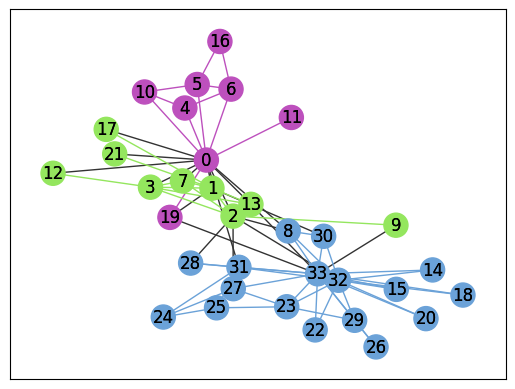

In [ ]:
karate_pos = nx.spring_layout(G_karate)
# Draw external edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_size=0,
    edgelist=external,
    edge_color="#333333")
# Draw nodes and internal edges
nx.draw_networkx(
    G_karate,
    pos=karate_pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

In the resulting visualization, one community is centered around Mr. Hi (node ID 0), one is
centered around John A. (node ID 33), and the third is composed of nodes between the
other two communities.

### Online social nework

The same community detection algorithm can be used on much larger networks, such as
online social networks. The following example uses a social network constructed from
combining the online social networks of 10 individuals (McAuley & Leskovec, 2012). The
following code loads and visualizes the network:

In [ ]:
# Load data file into network

G_social = nx.read_edgelist('/content/drive/MyDrive/recitation_network data analysis/Network Data/facebook_combined.txt')

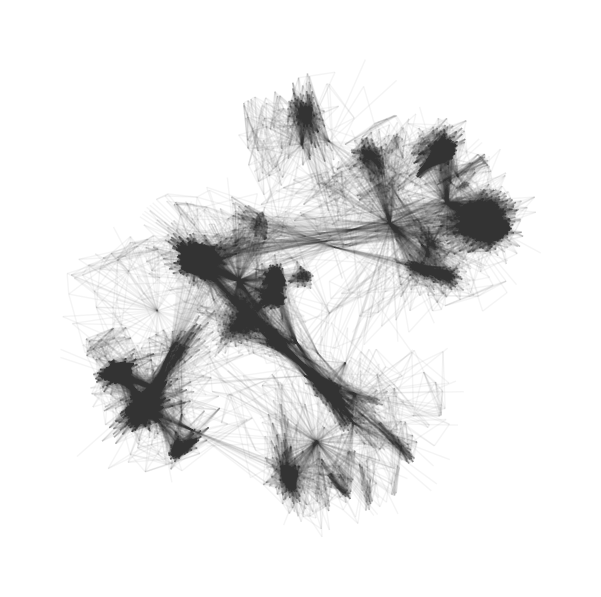

In [ ]:
# Caluclate layout and draw
pos = nx.spring_layout(G_social, k=0.1)
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)

Looking at the visualization, there appears to be a high level of community structure. The
preceding example uses greedy_modularity_communities() to find those communities:

In [ ]:
communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)
len(communities)

16

As with the karate club network previously, we can visualize the communities using color.
First, the community property of each node and each internal edge is set:

In [ ]:
# Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)

NameError: ignored

Next, we create lists containing the external and internal edges:

In [ ]:
# Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]


We then use our get_color() helper function to create a list of colors for the internal
edges:

In [ ]:
internal_color = [get_color(G_social.edges[e]['community']) for e in internal]

Finally, the following code uses draw_networkx() to visualize the network:

In [ ]:
# Draw external edges
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edgelist=external, edge_color="#333333",
    alpha=0.2, with_labels=False)
# Draw internal edges
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edgelist=internal, edge_color=internal_color,
    alpha=0.05, with_labels=False)

# Visualization

In [ ]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand
seed = hash("Network Science in Python") % 2**32
nprand.seed(seed)
random.seed(seed)
# Import NetworkX
import networkx as nx

## Circular Layout

the simplest network layout, the circular layout, places the nodes of a network
evenly around a circle. The benefits of this layout include the following points:


1. Highlighting local structure
2. Clearly showing each individual edge




In [ ]:
G_karate = nx.karate_club_graph()

NetworkX provides a circular layout through the circular_layout() function. As with
all NetworkX layouts, it creates a dictionary that maps node labels to (x, y) tuples, which
can then be passed as the pos argument to any of the drawing functions.
Applying the default circular layout to the Zachary karate club network creates a
reasonably clear visualization, as follows:

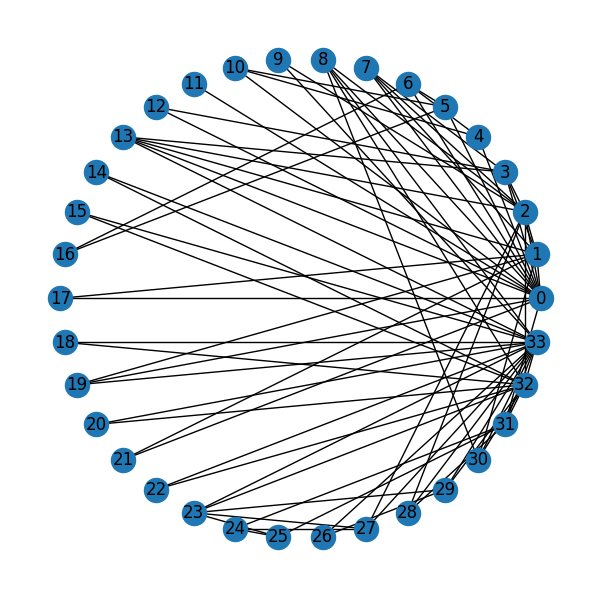

In [ ]:
nx.draw_networkx(G_karate, pos=nx.circular_layout(G_karate))

However, we can do even better. The default circular layout places nodes in the order they
were added to the Graph object, which can create many unnecessary edge crossings in the
visualization. While NetworkX doesn't have a built-in way to reduce those edge crossings,
it is simple enough to do with a little extra work.
If groups of highly interconnected nodes are placed next to each other around the circle,
then their connections will be localized, preventing unnecessary overlaps and highlighting
community structure. The following code copies a Graph object, reordering the nodes to
group them by community:

In [ ]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [ ]:
import networkx.algorithms.community as nxcom
def community_net(G_in):
    G_out = nx.Graph()
    node_color = []
    node_community = {}
    communities = nxcom.greedy_modularity_communities(G_in)
    for i, com in enumerate(communities):
        for v in com:
            G_out.add_node(v)
            node_color.append(get_color(i))
            node_community[v] = i
    G_out.add_edges_from(G_in.edges())
    return node_color, node_community, G_out

In [ ]:
node_color, node_community, G = community_net(G_karate)

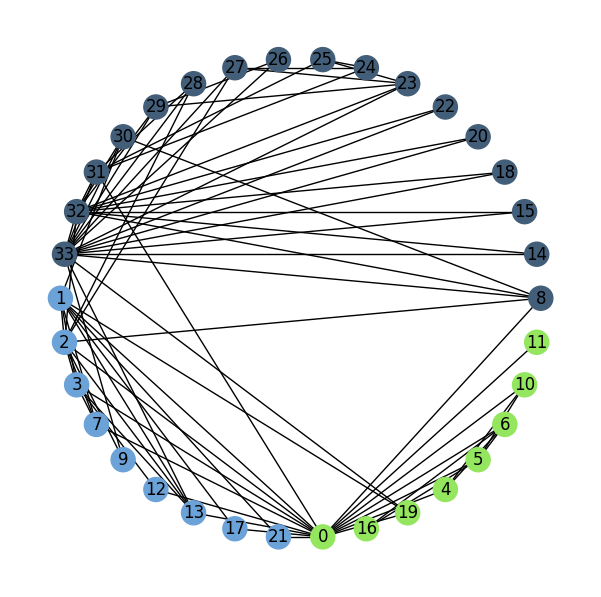

In [ ]:
nx.draw_networkx(G, pos=nx.circular_layout(G), node_color=node_color)

## Shell Layout

If you liked the circle layout, you'll love the shell layout—it's just a lot of circles. The shell
layout places nodes in concentric circles. Its benefits include the following:

1.   Can visualize more nodes than a circular layout in the same space
2.   More central nodes can be placed closer to the center to convey centrality information


However, the shell layout still does not capture community structure well, and can obscure
some edges.

The following code uses the NetworkX shell_layout() function to visualize the karate
club network. It's possible to use the default settings, but this example also uses community
detection to place related nodes in similar locations:

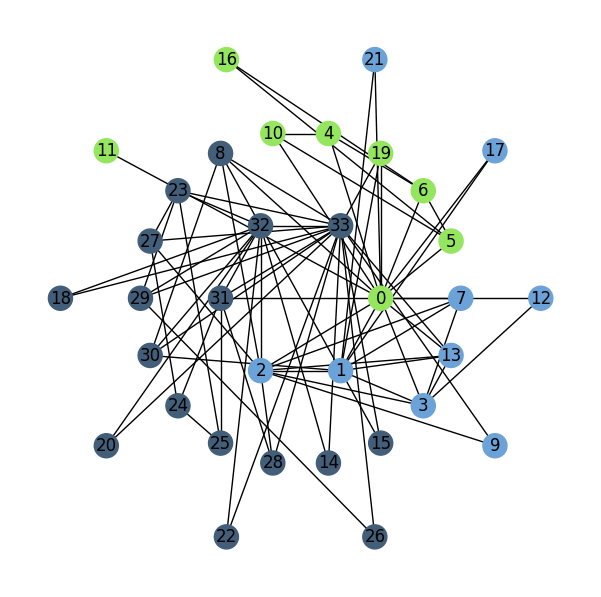

In [ ]:
degrees = dict(G.degree())
labels = sorted(degrees.keys(), key=lambda x: degrees[x], reverse=True)
nlist = []
i, k = 0, 6
while i < len(labels):
    shell_labels = labels[i:i+k]
    ordered_labels = sorted(shell_labels, key=lambda x: node_community[x])
    nlist.append(ordered_labels)
    i += k
    k += 12
pos = nx.shell_layout(G, nlist=nlist)
cm = plt.get_cmap('cool')
nx.draw_networkx(
    G, pos, alpha=1, node_color=node_color, with_labels=True)

Note that the highest degree nodes, including John A. and Mr. Hi, are in the centermost
circle, with the least connected nodes around the edge.

# Assortativeness Analysis 

## Node assortativity coefficients and correlation measures

In this section, we will go through the theory of [assortativity](https://en.wikipedia.org/wiki/Assortativity) and its measures.

Specifically, we'll focus on assortativity measures available in NetworkX at [algorithms/assortativity/correlation.py](https://github.com/networkx/networkx/blob/main/networkx/algorithms/assortativity/correlation.py):
* Attribute assortativity
* Numeric assortativity
* Degree assortativity

as well as mixing matrices, which are closely releated to assortativity measures.

## Assortativity

**Assortativity in a network refers to the tendency of nodes to connect with
other 'similar' nodes over 'dissimilar' nodes.**

Here we say that two nodes are 'similar' with respect to a property if they have the same value of that property. Properties can be any structural properties like the degree of a node to other properties like weight, or capacity.

Based on these properties we can have a different measure of assortativity for the network.
On the other hand, we can also have disassortativity, in which case nodes tend
to connect to dissimilar nodes over similar nodes.

### Assortativity coefficients

Let's say we have a network $N$, $N = (V, E)$  where $V$ is the set of nodes in the network and $E$ is the set of edges/directed edges in the network.
In addition, $P(v)$ represents a property for each node $v$.


#### Degree Assortativity Coefficient

When it comes to measuring degree assortativity for directed networks we have
more options compared to assortativity w.r.t a property because we have 2 types
of degrees, namely in-degree and out-degree.
Based on the 2 types of degrees we can measure $2 \times 2 =4$ different types
of degree assortativity [^2]:

1. r(in,in) : Measures tendency of having a directed edge (u,v) such that, in-degree(u) = in-degree(v).
2. r(in,out) : Measures tendency of having a directed edge (u,v) such that, in-degree(u) = out-degree(v).
3. r(out,in) : Measures tendency of having a directed edge (u,v) such that, out-degree(u) = in-degree(v).
4. r(out,out) : Measures tendency of having a directed edge (u,v) such that, out-degree(u) = out-degree(v).

Note: If the network is undirected all the 4 types of degree assortativity are the same.


####Mathematical Definition

let $\sigma_a$ and $\sigma_b$ represent the standard deviation of
$\{\ P[i]\cdot a[i]\ |\ i \in 0...k-1\}$ and $\{ P[i]\cdot b[i]\ |\ i \in 0...k-1\}$
respectively.


Let $x,y \in \{in,out\}$. The property $P(\cdot)$ takes distinct values from
the union of the values taken by $x$-degree$(\cdot)$ and $y$-degree$(\cdot)$,
and $e_{i,j}$ is the proportion of directed edges $(u,v)$ with $x$-degree$(u) = P_i$
and $y$-degree$(v) = P_j$.



$$ r(x,y) = \frac{\sum\limits_{i,j}P_i P_j(e_{ij} -a_i b_j)}{\sigma_a\sigma_b} $$

It is implemented as `degree_assortativity_coefficient` and
`degree_pearson_correlation_coefficient`. The latter function uses
`scipy.stats.pearsonr` to calculate the assortativity coefficient which makes
it potentally faster.



In [ ]:
filepath = '/content/drive/MyDrive/recitation_network data analysis/Network Data/Roget.net'
G = nx.DiGraph()
flag = True
with open(filepath,"r") as f:
    for line in f:
        if "Arcslist" in line:
            flag = False
        elif flag == True:
            node_index = line.split()[0]
            Label = line.split()[-1][1:-1]
            G.add_node(node_index, node_name = Label)
        elif flag == False: 
            nodes = line.split()
            base_node = nodes[0]
            for n in nodes[1:]:
                G.add_edge(base_node, n, weight=1)

The network Roget.net is based on the file roget.dat from the Stanford GraphBase that contains cross-references in Roget's Thesaurus, 1879.

Network vertices represent categories in the 1879 edition of Peter Mark Roget's Thesaurus of English Words and Phrases, and edges represent references between categories

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 1023
Number of edges: 5075


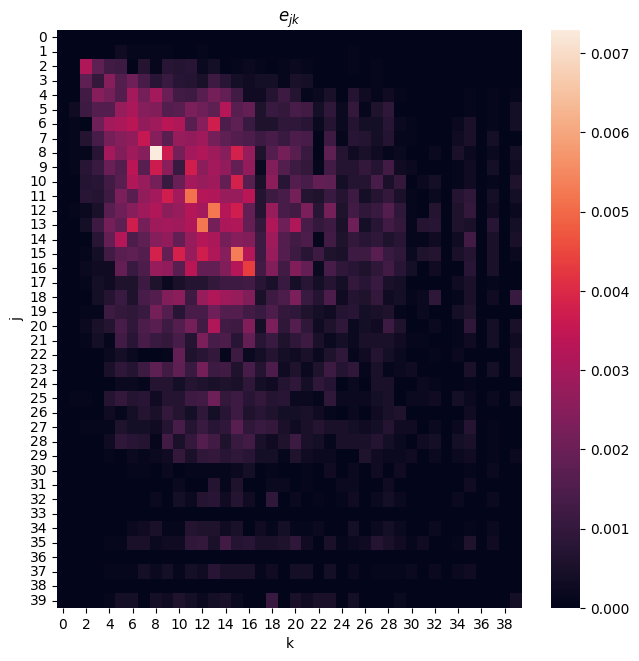

0.1701795747458771
This network is assortive as  More strength in the diagonal, hubs tend to link to each other also the r value is positive


In [ ]:
degrees = nx.degree(G)

max_degree = max(list(dict(degrees).values()))
matrix = np.zeros((max_degree +1,max_degree +1))

for edge in G.edges:
    k1 = degrees[edge[0]]
    k2 = degrees[edge[1]]
    matrix[k1][k2] += 1 
    matrix[k2][k1] += 1 
 
matrix /= matrix.sum()
ax = sns.heatmap(matrix)
plt.xlabel("k")
plt.ylabel("j")
plt.title("$e_{jk}$")
plt.show()
print(nx.degree_pearson_correlation_coefficient(G))
print("This network is assortive as  More strength in the diagonal, hubs tend to link to each other also the r value is positive")

#Gephi Tutorials on Youtube

[Gephi Tutorials on Youtube](https://www.youtube.com/watch?v=371n3Ye9vVo&list=PLk_jmmkw5S2BqnYBqF2VNPcszY93-ze49)

In [ ]:
DATA_PATH = "/content/drive/MyDrive/recitation_network data analysis/gexf"

In [ ]:
nx.write_gexf(G, '{}/N1.gexf'.format(DATA_PATH))